In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [7]:
np.random.seed(42)
data=np.random.normal(loc=50,scale=10,size=100)
outliers=np.array([10,110,5,120])
data=np.concatenate([data,outliers])

In [11]:
df=pd.DataFrame(data,columns=['Value'])
df.head()


,Value
0,54.967142
1,48.617357
2,56.476885
3,65.230299
4,47.658466


In [10]:

df.tail()

,Value
99,47.654129
100,10.000000
101,110.000000
102,5.000000
103,120.000000


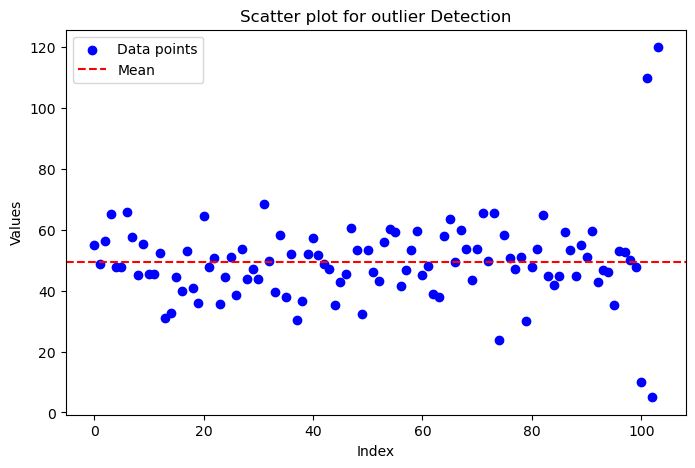

In [15]:
plt.figure(figsize=(8, 5))
plt.scatter(range(len(df)), df['Value'], color='blue', label='Data points')  # Fixed column name here
plt.axhline(y=df['Value'].mean(), color='red', linestyle='--', label='Mean')  # Fixed column name here
plt.xlabel("Index")
plt.ylabel("Values")
plt.title("Scatter plot for outlier Detection")
plt.legend()
plt.show()

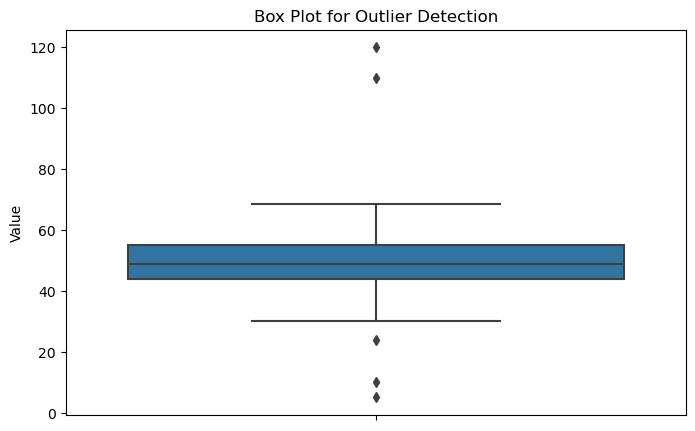

In [17]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, y='Value')  # Fixed column name here
plt.title("Box Plot for Outlier Detection")
plt.show()


In [ ]:
**Z-score Method**
**formula  Z= X−μ/σ**

In [18]:
df['Z-score']=zscore(df['Value'])
df['Outlier_Z']=df['Z-score'].apply(lambda x: 'Outlier' if abs(x) > 3 else 'Normal')
print(df[df['Outlier_Z']== 'Outlier'])

     Value   Z-score Outlier_Z
101  110.0  4.328173   Outlier
102    5.0 -3.175368   Outlier
103  120.0  5.042796   Outlier


In [ ]:
**IQR(Interquartile Range) method
IQR=Q3-Q1**
**Lower Bound=Q1-1.5*IQR
upper bound=Q3+1.5*IQR **

In [25]:
Q1=df['Value'].quantile(0.25)
Q3=df['Value'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
df['Outlier_IQR']=df['Value'].apply(lambda x: 'Outlier' if (x < lower_bound or x > upper_bound) else 'Normal')
print(df[df['Outlier_IQR']== 'Outlier'])

          Value   Z-score Outlier_Z Outlier_IQR
74    23.802549 -1.831694    Normal     Outlier
100   10.000000 -2.818056    Normal     Outlier
101  110.000000  4.328173   Outlier     Outlier
102    5.000000 -3.175368   Outlier     Outlier
103  120.000000  5.042796   Outlier     Outlier


In [ ]:
**Finding Outliers Using the IQR Method with a 5-Number Summary**

The 5-number summary consists of:
 
Minimum (Q0) → The smallest value in the dataset.
 
First Quartile (Q1) → The 25th percentile (lower quartile).
 
Median (Q2) → The 50th percentile (middle value).
 
Third Quartile (Q3) → The 75th percentile (upper quartile).
 
Maximum (Q4) → The largest value in the dataset.
 
The Interquartile Range (IQR) is calculated as:
 
IQR=Q3−Q1
 
Any value outside the range:
 
[Q1−1.5×IQR,Q3+1.5×IQR]  is considered an outlier.
 
**Let's generate a dataset, compute the 5-number
summary,and find the outliers using the IQR**    

In [33]:
import numpy as np
np.random.normal(42)
data = np.random.normal(loc=50, scale=10, size=20)
outlier=np.array([10,110,5,120])
data=np.concatenate([data,outliers])

q1 = np.percentile(data, 25)
q2=np.median(data)
q3 = np.percentile(data, 75)
minimum = np.min(data)
maximum = np.max(data)

iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = data[(data < lower_bound) | (data > upper_bound)]

print(f"Minimum (Q0): {minimum}")
print(f"First Quartile (Q1): {q1}")
print(f"Median (Q2): {median}")
print(f"Third Quartile (Q3): {q3}")
print(f"Maximum (Q4): {maximum}")
print(f"Interquartile Range (IQR): {iqr}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
print(f"Outliers: {outliers}")



Minimum (Q0): 37.77126463324693
First Quartile (Q1): 46.41056406465719
Median (Q2): 49.98278577243415
Third Quartile (Q3): 58.859827138120224
Maximum (Q4): 75.39162716269333
Interquartile Range (IQR): 12.449263073463037
Lower Bound: 27.736669454462632
Upper Bound: 77.53372174831478
Outliers: []
